<a href="https://colab.research.google.com/github/CaptainVivi/Data-Visualisations/blob/main/NYC_Crime_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

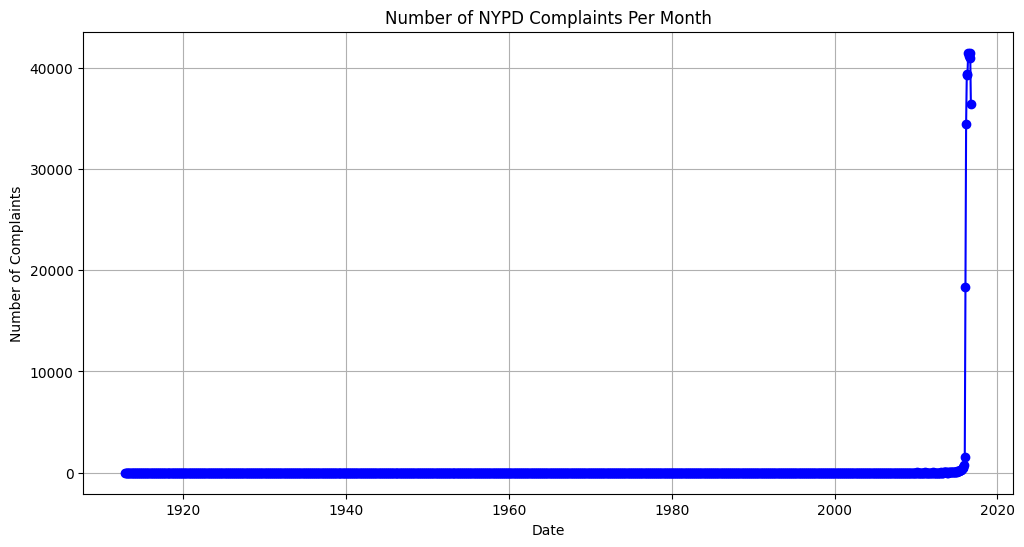

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('NYPD_Complaint_Data_Current_YTD.csv')

# Convert the 'CMPLNT_FR_DT' column to datetime format
data['CMPLNT_FR_DT'] = pd.to_datetime(data['CMPLNT_FR_DT'], errors='coerce')

# Drop rows with NaN values in 'CMPLNT_FR_DT'
data = data.dropna(subset=['CMPLNT_FR_DT'])

# Set the 'CMPLNT_FR_DT' as the index
data.set_index('CMPLNT_FR_DT', inplace=True)

# Resample the data by month and count the number of complaints per month
monthly_complaints = data.resample('M').size()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(monthly_complaints, marker='o', linestyle='-', color='b')
plt.title('Number of NYPD Complaints Per Month')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.grid(True)
plt.show()


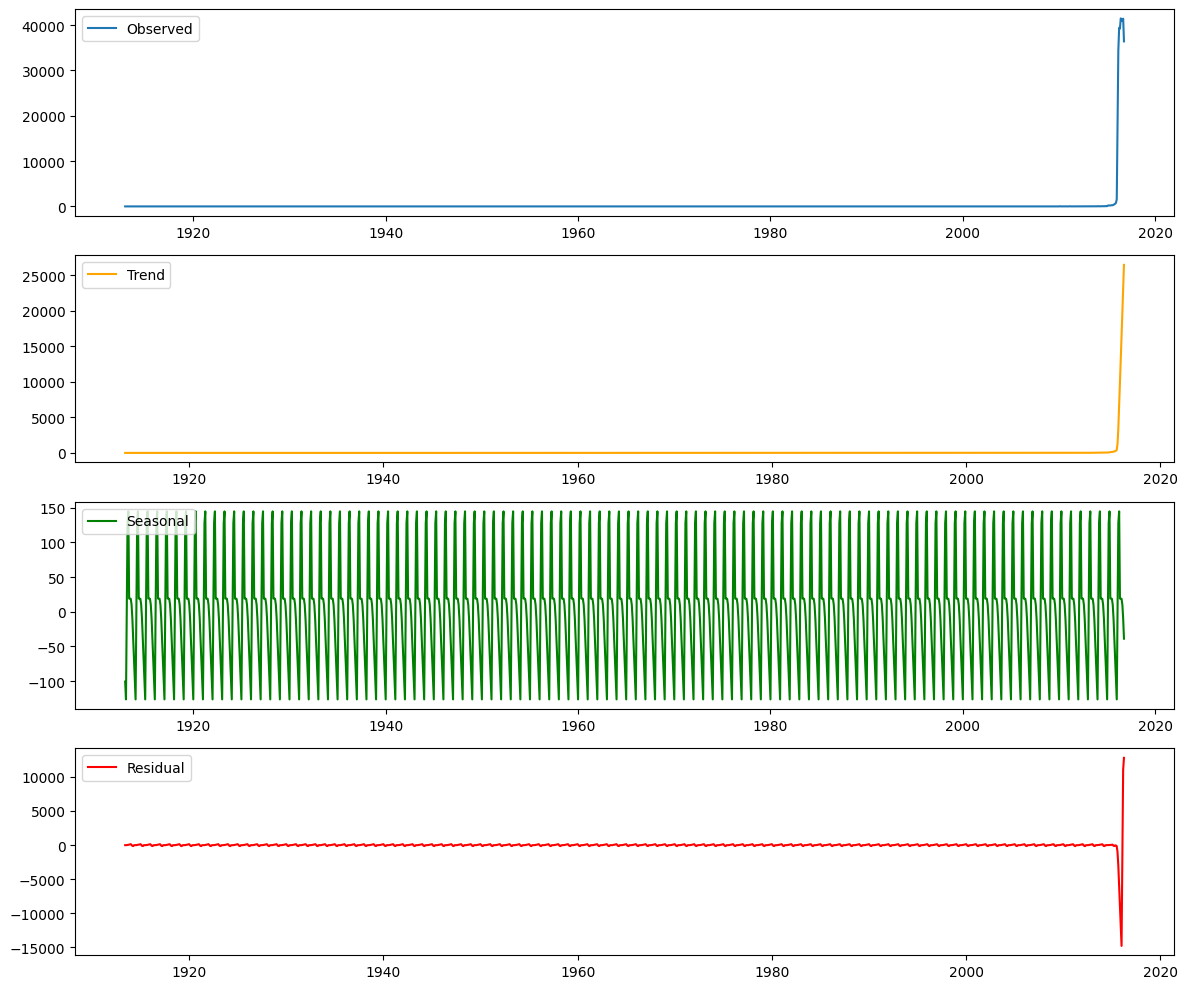

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(monthly_complaints, model='additive')

# Plot the decomposed components
plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


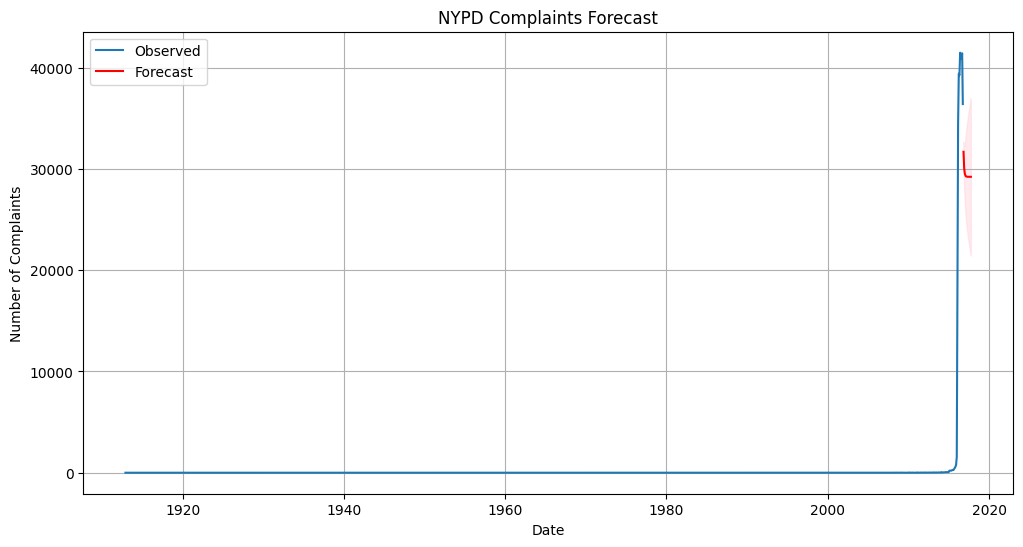

In [3]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model (order (p,d,q) will be determined automatically)
model = ARIMA(monthly_complaints, order=(1, 1, 1))
arima_result = model.fit()

# Forecast the next 12 months
forecast = arima_result.get_forecast(steps=12)
forecast_index = pd.date_range(start=monthly_complaints.index[-1] + pd.offsets.MonthBegin(1), periods=12, freq='M')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)
forecast_conf_int = forecast.conf_int()

# Plot the actual data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_complaints, label='Observed')
plt.plot(forecast_series, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('NYPD Complaints Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


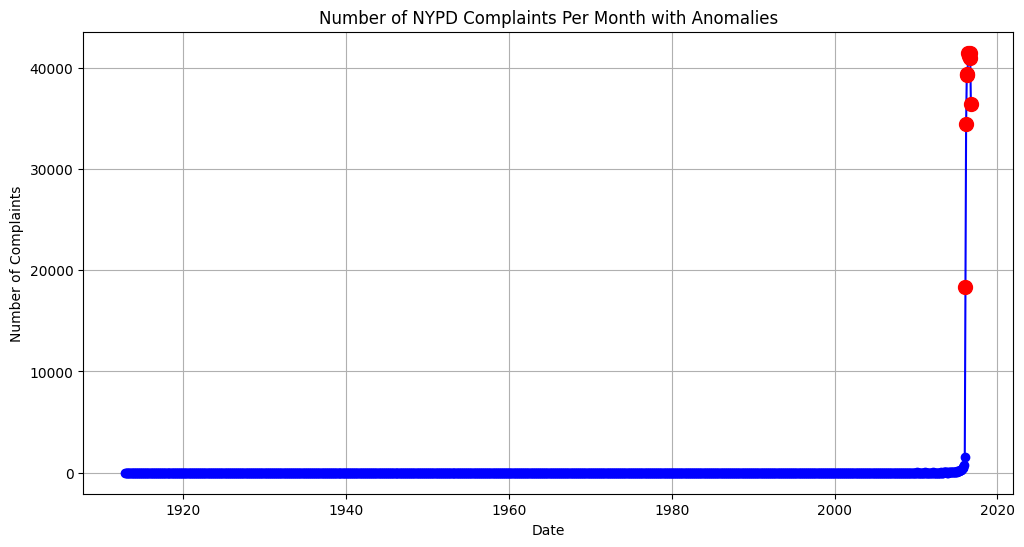

In [4]:
from scipy import stats

# Calculate z-scores to identify anomalies
z_scores = stats.zscore(monthly_complaints)
abs_z_scores = abs(z_scores)
anomalies = abs_z_scores > 3

# Plot the anomalies
plt.figure(figsize=(12, 6))
plt.plot(monthly_complaints, marker='o', linestyle='-', color='b')
plt.plot(monthly_complaints[anomalies], 'ro', markersize=10)
plt.title('Number of NYPD Complaints Per Month with Anomalies')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.grid(True)
plt.show()


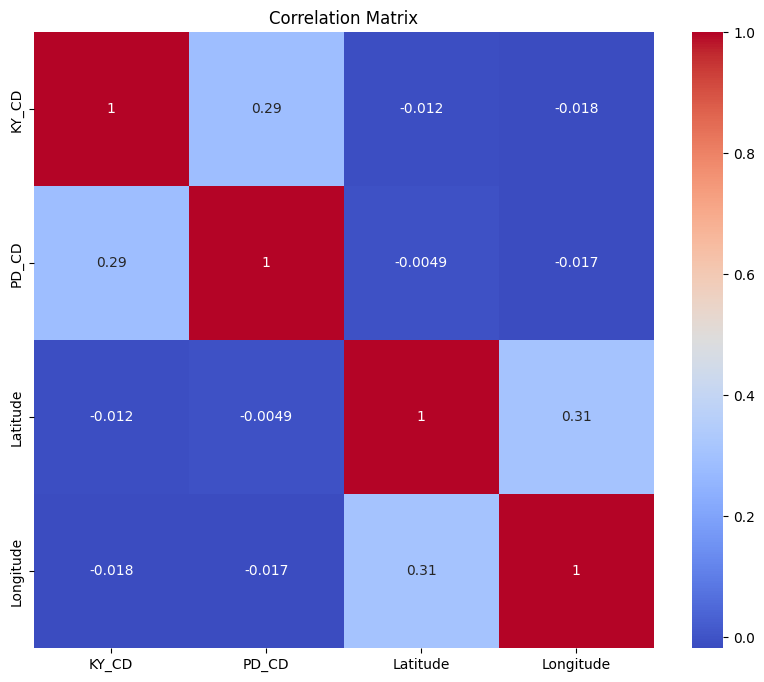

In [5]:
import seaborn as sns

# Extract relevant columns for correlation analysis
correlation_data = data[['KY_CD', 'PD_CD', 'Latitude', 'Longitude']].dropna()

# Compute the correlation matrix
corr_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
